# Feature Selection & Feature Importances

In [58]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

![baby penguin gif from Giphy](https://media.giphy.com/media/RiJuDMqd6vDgfPrZN2/giphy.gif)

Let's hang out with some penguins, loading up a dataset straight from seaborn:

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
culmen_length_mm     342 non-null float64
culmen_depth_mm      342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Let's clean up this dataset - two rows have quite a few null values, and 11 total do not have a value for `sex`, so let's drop rows where any data is null:

In [7]:
11/344

0.03197674418604651

In [5]:
# Drop nulls here
data = data.dropna(how='any')

In [6]:
# Sanity check
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
species              333 non-null object
island               333 non-null object
culmen_length_mm     333 non-null float64
culmen_depth_mm      333 non-null float64
flipper_length_mm    333 non-null float64
body_mass_g          333 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Encoding Our Data

In [9]:
data[['species','island','sex']].describe()

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


In order to use the `gender`, `species` or `island` data we need to render those strings as numbers - since there are only 2-3 unique values per column, let's simply one-hot-encode those columns (aka turn the columns into a series of binary indicators).

Using Pandas' `get_dummies` : https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html

In [10]:
# One hot encode our three 'object' columns
data_num = pd.get_dummies(data, columns=['species', 'island', 'sex'],
                          drop_first=True)

In [11]:
data_num.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


You'll note that Pandas' `get_dummies` drops the first option, which means one of the species and one of the islands won't be obvious in our features. A thing to keep in mind!

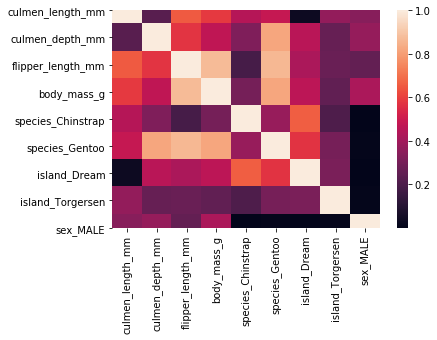

In [12]:
sns.heatmap(data_num.corr().abs())
plt.show()

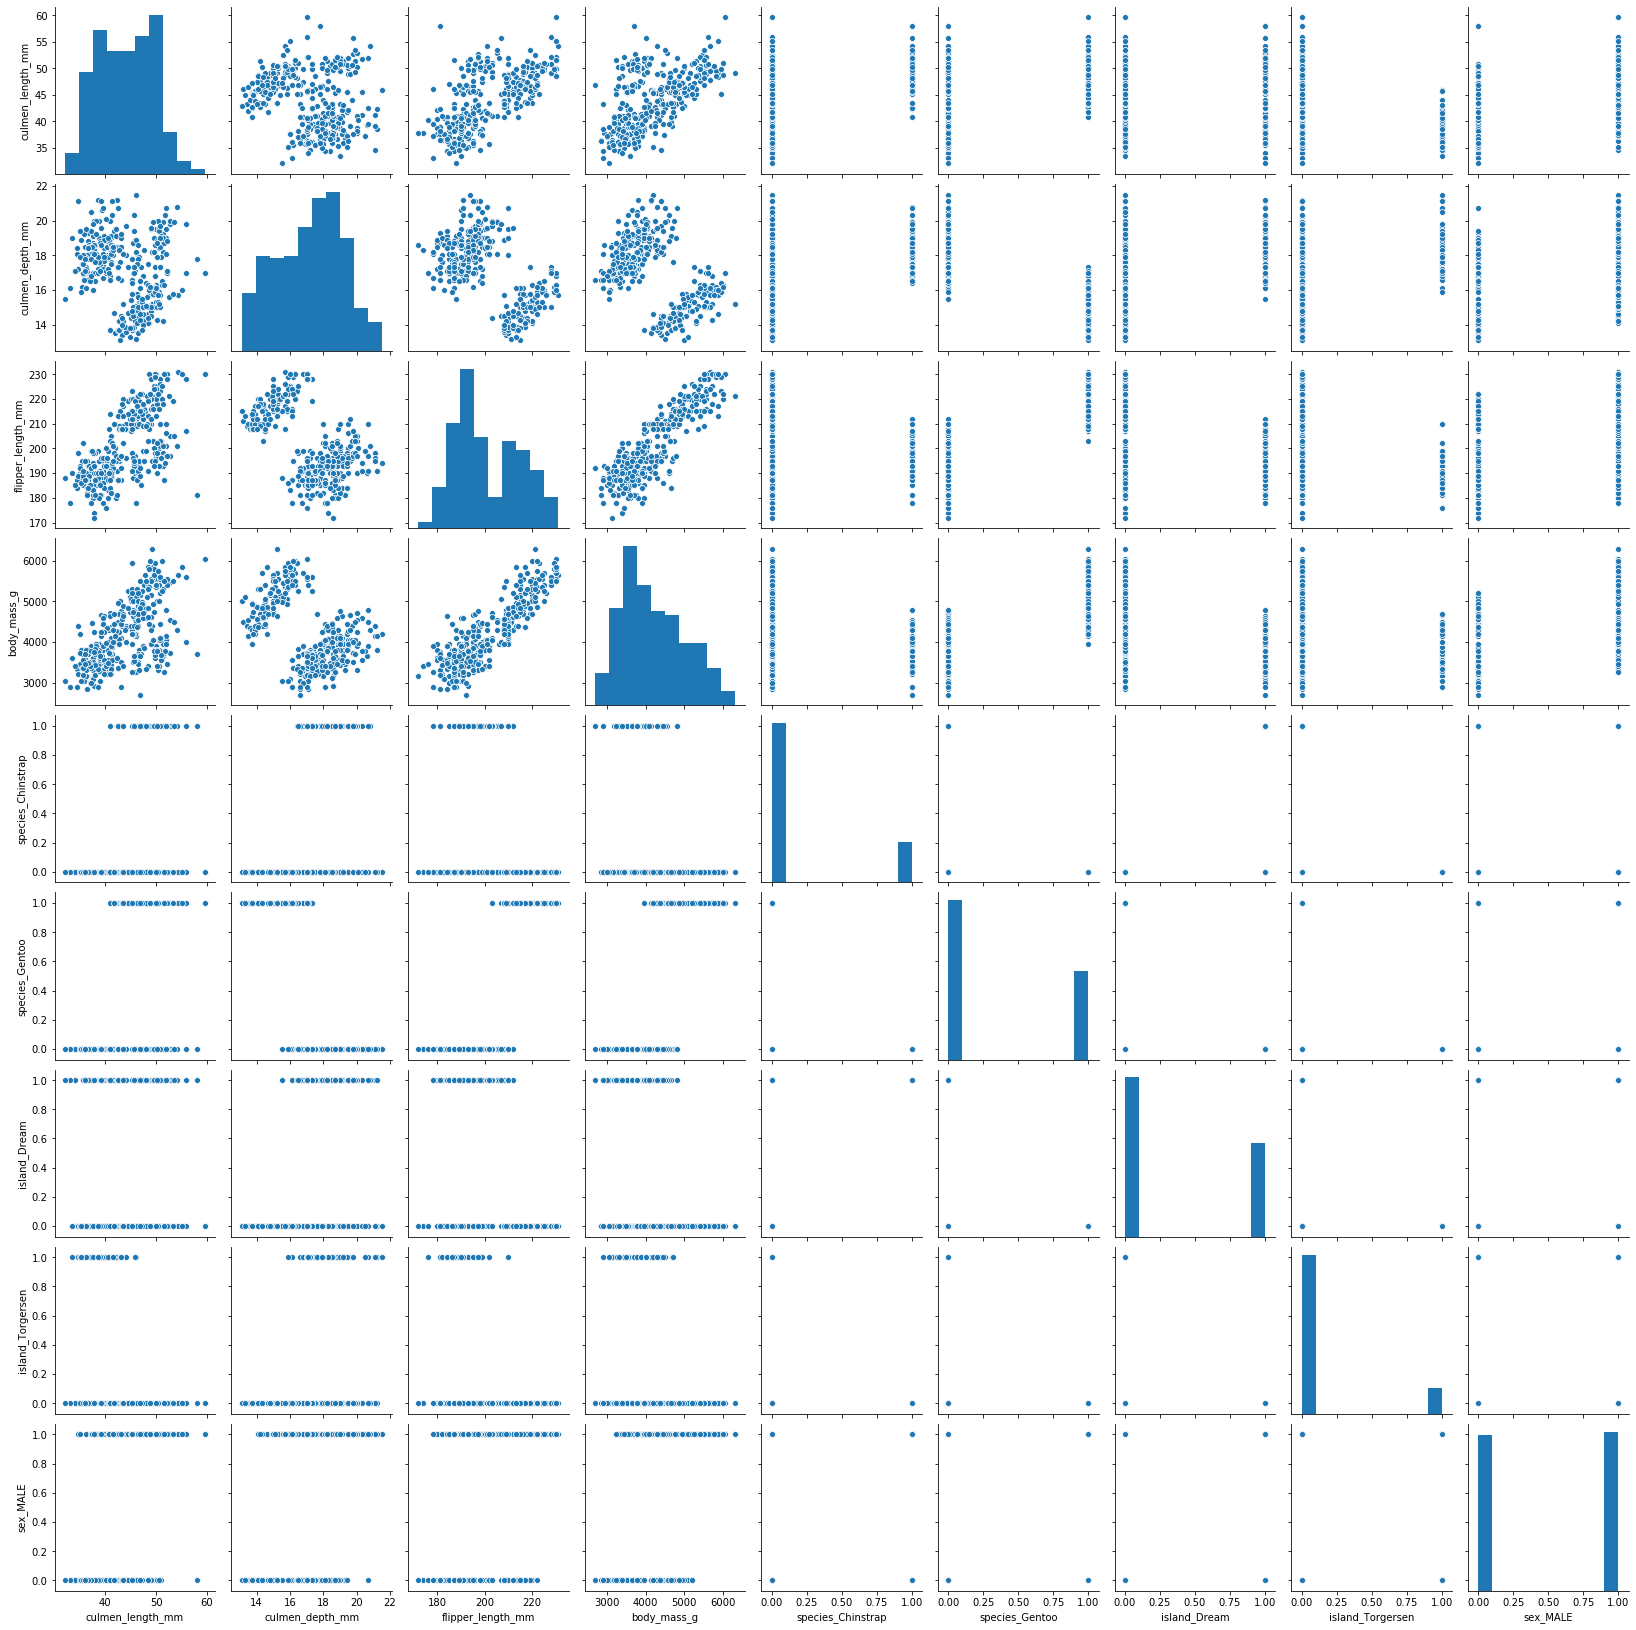

In [13]:
sns.pairplot(data_num)

The goal of this is to predict body mass, `body_mass_g`, so let's define our X and y and perform a train/test split:

In [14]:
# Define X and y
X_cols = [c for c in data_num.columns.to_list() if c not in ['body_mass_g']]

X = data_num[X_cols]
y = data_num.body_mass_g

In [15]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
len(X_test) + len(X_train) == len(X)

True

In [17]:
X_train.shape

(249, 8)

In [18]:
X_test.shape

(84, 8)

In [19]:
# Instantiate a scaler
scaler = StandardScaler()

In [20]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baseline Linear Regression Model

In [21]:
# Instantiate a linear regression model
lr = LinearRegression()

In [22]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
import numpy as np

In [64]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred, squared=False)}")

Training Scores:
R2: 0.876480886584598
Mean Absolute Error: 227.22625938161679
---
Testing Scores:
R2: 0.8662040552617405
Mean Absolute Error: 225.07061531137012
Root Mean Squared Error V1: 287.17112039406027
Root Mean Squared Error V2: 287.17112039406027


## Feature Importance through Coefficients

Because we've scaled our data, we can explore our coefficients to see which are having more of an impact on our model.

Note! This, or using p-values from a statsmodels model, is all I expect you to do in this project - anything else we talk about today is completely optional and going above and beyond!

In [43]:
# look at the coefficients with the names of each col
pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')[0].sort_values()

species_Chinstrap   -106.975994
island_Torgersen     -36.339450
island_Dream         -34.850423
culmen_length_mm     101.275739
culmen_depth_mm      156.939307
sex_MALE             179.401476
flipper_length_mm    252.688781
species_Gentoo       454.719765
Name: 0, dtype: float64

In [25]:
# let's also look at the intercept
lr.intercept_

4226.907630522089

### [ELI5](https://eli5.readthedocs.io/en/latest/index.html)

ELI5, short for 'explain like I'm 5', is a library specifically designed to help explore feature importances. It'll help you visualize exactly what we just did above!

In [26]:
import eli5

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# don't have eli5? uncomment the below code
# pip install eli5

In [27]:
eli5.show_weights(lr, feature_names=list(X.columns))

Weight?,Feature
+4226.908,<BIAS>
+454.720,species_Gentoo
+252.689,flipper_length_mm
+179.401,sex_MALE
+156.939,culmen_depth_mm
+101.276,culmen_length_mm
-34.850,island_Dream
-36.339,island_Torgersen
-106.976,species_Chinstrap


In [30]:
import statsmodels.api as sm

In [47]:
pd.DataFrame(X_train_scaled, columns=X.columns)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,0.659785,-1.089851,1.057391,-0.526235,1.329160,-0.772110,-0.397668,-1.028519
1,0.937954,-0.990575,1.414444,-0.526235,1.329160,-0.772110,-0.397668,0.972272
2,0.437250,0.349661,-0.656460,1.900292,-0.752355,1.295152,-0.397668,-1.028519
3,-1.176128,0.448938,-0.585050,-0.526235,-0.752355,1.295152,-0.397668,0.972272
4,0.400161,-0.692744,0.985981,-0.526235,1.329160,-0.772110,-0.397668,0.972272
...,...,...,...,...,...,...,...,...
244,0.956498,-0.742383,1.128802,-0.526235,1.329160,-0.772110,-0.397668,0.972272
245,0.159081,-0.891298,1.343033,-0.526235,1.329160,-0.772110,-0.397668,0.972272
246,-1.435753,-0.047446,-1.227744,-0.526235,-0.752355,-0.772110,-0.397668,-1.028519
247,-0.564157,0.200746,-1.370565,-0.526235,-0.752355,-0.772110,2.514663,-1.028519


In [49]:
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

In [57]:
results = model.summary()

In [51]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     212.9
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          2.08e-104
Time:                        17:58:21   Log-Likelihood:                -1760.3
No. Observations:                 249   AIC:                             3539.
Df Residuals:                     240   BIC:                             3570.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4226.9076     18.360    230.218      0.000    4190.739    4263.076
x1           101.2757     44.677      2.267      0.024      13.267     189.285
x2           156.9393     46.061      3.407      0.001      66.203     247.675
x3           252.6888     46.738      5.406      0.000     160.620     344.758
x4          -106.9760     42.356     -2.526      0.012    -190.414     -23.538
x5           454.7198     74.578      6.097      0.000     307.809     601.630
x6           -34.8504     33.624     -1.036      0.301    -101.086      31.385
x7           -36.3395     24.753     -1.468      0.143     -85.101      12.422
x8           179.4015     28.402      6.316      0.000     123.452     235.351
==============================================================================
Omnibus:                        2.125   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                2.004
Skew:                           0.220   Prob(JB):                        0.367
Kurtosis:                       3.003   Cond. No.                         8.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So what?

You can use feature importances, or an exploration of statistical significance through statsmodels' provided p-values, to decide which features to keep and which ones to drop in your next iteration of your model! Especially if you OHE a lot of columns, you might use this technique to grab only useful indicators rather than keeping every feature you build in your model.

Will dropping seemingly 'low' features in terms of feature importance always help improve your scores? Nope! Will each way of understanding which feature is 'important' always have the same results? Nope! But try different techniques, see what you think and what helps your model, then iterate.

In terms of interpretation, you may want to get to a final model in terms of what features are used and how you process your data - then build a version of that final model on data that isn't scaled so you can see exactly how each unit of each feature directly impacts your target!

In [28]:
lr_ns = LinearRegression()

lr_ns.fit(X_train, y_train)

# Evaluate
y_train_pred = lr_ns.predict(X_train)
y_test_pred = lr_ns.predict(X_test)

# these scores should be exactly the same
print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")

Training Scores:
R2: 0.876480886584598
Mean Absolute Error: 227.22625938161679
---
Testing Scores:
R2: 0.8662040552617404
Mean Absolute Error: 225.07061531137026


In [29]:
# BUT the feature importances will be totally different
eli5.show_weights(lr_ns, feature_names=list(X.columns))

Weight?,Feature
+946.506,species_Gentoo
+358.945,sex_MALE
+77.902,culmen_depth_mm
+18.781,culmen_length_mm
+18.045,flipper_length_mm
-72.045,island_Dream
-105.832,island_Torgersen
-259.580,species_Chinstrap
-2001.128,<BIAS>


Rather than interpret anything about this (you can NOT interpret relative feature importances based on unscaled coefficients!!), you can use these coefficients now to discuss how each unit affects the target.

Example: each additional mm of flipper length adds 17.472g of body mass, being a Gentoo penguin adds 810.346g of body mass, etc.

-----

## Above and Beyond: Regularization Terms

Suppose I have split my data into training and testing sets. Do I want my model to fit my training data _exactly_?

Often, the answer is actually 'NO!', because doing that will lead to an overfit model.

Overfitting is generally a result of high variance. High variance can be caused by:

- having irrelevant or too many predictors
- multicollinearity
- large coefficients

The first problem is about picking up on noise rather than signal.

The second problem is about having a least-squares estimate that is highly sensitive to random error.

The third is about having highly sensitive predictors.

Regularization works by introducing a factor into our model designed to enforce the stricture that the coefficients stay small, by penalizing the ones that get too large.

That is, we'll alter our loss function so that the goal now is not merely to minimize the difference between actual values and our model's predicted values. Rather, we'll add in a term to our loss function that represents the sizes of the coefficients.

There are two popular ways of doing this:

Lasso ("L1"): Minimize $\large\Sigma^{n_{obs.}}_{i=1}[(y_i - \Sigma^{n_{feat.}}_{j=0}\beta_j\times x_{ij})^2 + \lambda\Sigma^{n_{feat.}}_{j=0}|\beta_j|]$
<br/> <br/>

Ridge ("L2"): Minimize $\large\Sigma^{n_{obs.}}_{i=1}[(y_i - \Sigma^{n_{feat.}}_{j=0}\beta_j\times x_{ij})^2 + \lambda\Sigma^{n_{feat.}}_{j=0}\beta^2_j]$

**$\rightarrow$ Don't let these formulas be intimidating. The first term in each of these (the sum of squares) is the same, and is just the familiar loss function that we've always used. What distinguishes the Lasso Regression from the Ridge Regression is only the extra term on the right. The Lasso uses the absolute values of the coefficients, while the Ridge uses the squares of the coefficients.**

For a given value of $\lambda$, the Ridge makes for a gentler reining in of runaway coefficients. The Lasso will more quickly reduce the contribution of individual predictors down to insignificance.

For a nice discussion of these methods in Python, see https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b.

**TL;DR:**

- L1 Regularization (LASSO) is good for feature selection

- L2 Regularization (Ridge) is good for reducing the impact of multicollinear features

(also, you can do both at the same time with a technique called [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html))

### L1 Norm: [LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

(Least Absolute Shrinkage and Selection Operator)

In [ ]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=.5)

In [ ]:
# Fit your new L1 model -  on the scaled data
lasso.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate
y_train_pred_l1 = lasso.predict(X_train_scaled)
y_test_pred_l1 = lasso.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred_l1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_l1)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred_l1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_l1)}")

Remember - what's the benefit of using LASSO?

In [ ]:
data_num.columns

In [ ]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lr.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lr.intercept_))
print("---")
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

### L2 Norm: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# Instantiate a lasso regression model
ridge = Ridge(alpha=.5)

In [ ]:
# Fit your new L2 model -  on the scaled data
ridge.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate
y_train_pred_l2 = ridge.predict(X_train_scaled)
y_test_pred_l2 = ridge.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred_l2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_l2)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred_l2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_l2)}")

In [ ]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lr.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lr.intercept_))
print("---")
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

All together:

In [ ]:
coef_dict = {}
for loc, col in enumerate(data_num.columns):
    coef_dict[col] = {"Unpenalized": lr.coef_[loc-1],
                      "LASSO": lasso.coef_[loc-1],
                      "Ridge": ridge.coef_[loc-1]}
pd.DataFrame.from_dict(coef_dict)

### Alpha Levels??

We started with the **hyperparameter** alpha set to `0.5` for both our LASSO and Ridge Models: now let's play around with it!

In [ ]:
alphas = [.25, .5, 1, 10, 50, 100]

In [ ]:
for a in alphas:
    lasso_testing = Lasso(alpha = a)
    lasso_testing.fit(X_train_scaled, y_train)
    y_train_pred_testing = lasso_testing.predict(X_train_scaled)
    y_test_pred_testing = lasso_testing.predict(X_test_scaled)

    print(f"Training Scores at alpha: {a}")
    print(f"R2: {r2_score(y_train, y_train_pred_testing)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_testing)}")
    print("---")
    print(f"Testing Scores at alpha: {a}")
    print(f"R2: {r2_score(y_test, y_test_pred_testing)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_testing)}")
    print("---")
    print(f"Coefficients at alpha: {a} are: {lasso_testing.coef_}")
    print(f"Intercept at alpha: {a} is:{lasso_testing.intercept_}")
    print("*" * 20)

In [ ]:
for a in alphas:
    ridge_testing = Ridge(alpha = a)
    ridge_testing.fit(X_train_scaled, y_train)
    y_train_pred_testing = ridge_testing.predict(X_train_scaled)
    y_test_pred_testing = ridge_testing.predict(X_test_scaled)

    print(f"Training Scores at alpha: {a}")
    print(f"R2: {r2_score(y_train, y_train_pred_testing)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_testing)}")
    print("---")
    print(f"Testing Scores at alpha: {a}")
    print(f"R2: {r2_score(y_test, y_test_pred_testing)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_testing)}")
    print("---")
    print(f"Coefficients at alpha: {a} are: {ridge_testing.coef_}")
    print(f"Intercept at alpha: {a} is:{ridge_testing.intercept_}")
    print("*" * 20)

### Resources

- [Stats course resource from Penn State](https://online.stat.psu.edu/stat508/lesson/5), going into detail about Regression Shrinkage Methods - aka regularization. This is pretty technical, and the code is in R, but goes into good detail about the motivation of why we do this and how this works.

- Kaggle has a course on Machine Learning interpretability, with a section on [Permutation Importance](https://www.kaggle.com/dansbecker/permutation-importance) if you'd like to explore that